In [1]:
import pandas as pd
import numpy as np

# Create a 4x6 dataframe with random numbers from 100 to 200
df = pd.DataFrame(np.random.randint(100, 201, size=(4, 6)), columns=list('ABCDEF'))
df = df.astype(float)
df

,A,B,C,D,E,F
0,137.0,189.0,146.0,183.0,139.0,174.0
1,183.0,148.0,162.0,196.0,143.0,123.0
2,174.0,189.0,146.0,198.0,114.0,101.0
3,116.0,110.0,121.0,140.0,115.0,139.0


In [2]:
def ruffini_division(coefficients, root):
    """
    Perform polynomial division using Ruffini's rule.
    
    Parameters:
    coefficients (list): List of coefficients of the polynomial.
    root (float): The root to divide the polynomial by (x - root).
    
    Returns:
    tuple: (quotient coefficients, remainder)
    """
    n = len(coefficients)
    quotient = [0] * (n - 1)
    quotient[0] = coefficients[0]
    
    for i in range(1, n - 1):
        quotient[i] = coefficients[i] + quotient[i - 1] * root
    
    remainder = coefficients[-1] + quotient[-1] * root
    
    return quotient, remainder

# Esempio di utilizzo
coefficients = [2, 3, -2, -3, -6]  # Coefficienti del polinomio 2x^4 + 3x^3 - 2x^2 - 3x - 6
# coefficients = [5, 0, -2, 0, -1, 4]  # Coefficienti del polinomio 5x^5 - 2x^3 - x + 4
root = -2  # Radice del polinomio (x + 2)
quotient, remainder = ruffini_division(coefficients, root)
print("Quoziente:", quotient)
print("Resto:", remainder)

Quoziente: [2, -1, 0, -3]
Resto: 0


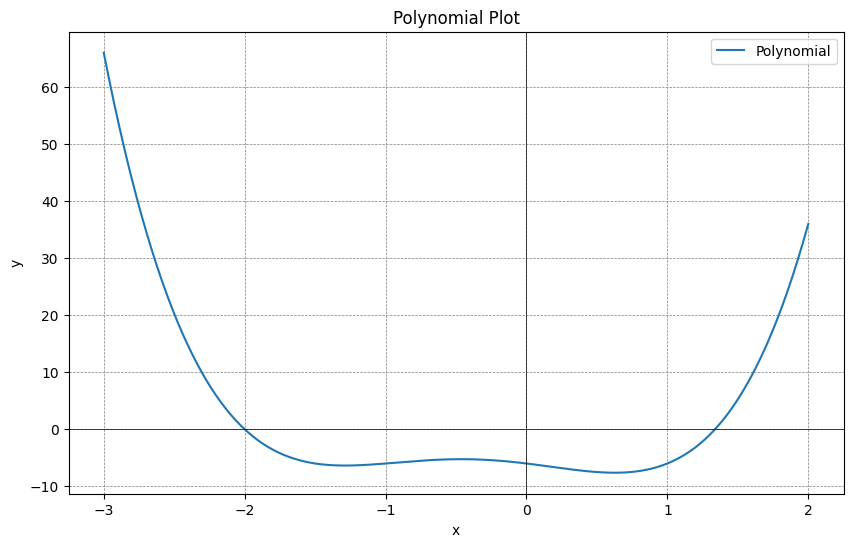

In [3]:
import matplotlib.pyplot as plt
# %pip install matplotlib
def plot_polynomial(coefficients):
    """
    Plot a polynomial given its coefficients.
    
    Parameters:
    coefficients (list): List of coefficients of the polynomial.
    """
    # Generate x values
    x = np.linspace(-3, 2, 400)
    
    # Calculate y values
    y = np.polyval(coefficients, x)
    
    # Plot the polynomial
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Polynomial')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.title('Polynomial Plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Esempio di utilizzo
plot_polynomial(coefficients)

In [4]:
def evaluate_polynomial(coefficients, x):
    """
    Evaluate a polynomial at a given value x.
    
    Parameters:
    coefficients (list): List of coefficients of the polynomial.
    x (float): The value at which to evaluate the polynomial.
    
    Returns:
    float: The value of the polynomial at x.
    """
    n = len(coefficients)
    result = 0
    for i in range(n):
        result += coefficients[i] * (x ** (n - i - 1))
    return result

# Esempio di utilizzo
x_value = -2
polynomial_value = evaluate_polynomial(coefficients, x_value)
print(f"Il valore del polinomio in x = {x_value} è: {polynomial_value}")

Il valore del polinomio in x = -2 è: 0


In [5]:
def polynomial_division(dividend, divisor):
    """
    Perform polynomial division.
    
    Parameters:
    dividend (list): List of coefficients of the dividend polynomial.
    divisor (list): List of coefficients of the divisor polynomial.
    
    Returns:
    tuple: (quotient coefficients, remainder coefficients)
    """
    # Initialize quotient and remainder
    quotient = []
    remainder = dividend[:]
    
    # Get the degree of the divisor
    divisor_degree = len(divisor) - 1
    divisor_lead_coeff = divisor[0]
    
    while len(remainder) >= len(divisor):
        # Get the leading coefficient of the current remainder
        lead_coeff = remainder[0]
        
        # Calculate the current term of the quotient
        current_term = lead_coeff / divisor_lead_coeff
        quotient.append(current_term)
        
        # Subtract the current term times the divisor from the remainder
        for i in range(len(divisor)):
            remainder[i] -= current_term * divisor[i]
        
        # Remove the leading zero from the remainder
        remainder.pop(0)
    
    return quotient, remainder

# Esempio di utilizzo
dividend = [-0.5, 3, -1.5, 1]  # Coefficienti del polinomio 2x^4 + 3x^3 - 2x^2 - 3x - 6
divisor = [2, -1]  # Coefficienti del polinomio x + 2
quotient, remainder = polynomial_division(dividend, divisor)
print("Quoziente:", quotient)
print("Resto:", remainder)

Quoziente: [-0.25, 1.375, -0.0625]
Resto: [0.9375]


In [6]:
from fractions import Fraction

def polynomial_division_fractional(dividend, divisor):
    """
    Perform polynomial division with fractional coefficients.
    
    Parameters:
    dividend (list): List of coefficients of the dividend polynomial.
    divisor (list): List of coefficients of the divisor polynomial.
    
    Returns:
    tuple: (quotient coefficients, remainder coefficients)
    """
    # Convert coefficients to fractions
    dividend = [Fraction(coef) for coef in dividend]
    divisor = [Fraction(coef) for coef in divisor]
    
    # Initialize quotient and remainder
    quotient = []
    remainder = dividend[:]
    
    # Get the degree of the divisor
    divisor_degree = len(divisor) - 1
    divisor_lead_coeff = divisor[0]
    
    while len(remainder) >= len(divisor):
        # Get the leading coefficient of the current remainder
        lead_coeff = remainder[0]
        
        # Calculate the current term of the quotient
        current_term = lead_coeff / divisor_lead_coeff
        quotient.append(current_term)
        
        # Subtract the current term times the divisor from the remainder
        for i in range(len(divisor)):
            remainder[i] -= current_term * divisor[i]
        
        # Remove the leading zero from the remainder
        remainder.pop(0)
    
    return quotient, remainder

# Esempio di utilizzo
dividend_fractional = [Fraction(-0.5), Fraction(3), Fraction(-1.5), Fraction(1)]
divisor_fractional = [Fraction(2), Fraction(-1)]
quotient_fractional, remainder_fractional = polynomial_division_fractional(dividend_fractional, divisor_fractional)
print("Quoziente:", quotient_fractional)
print("Resto:", remainder_fractional)

Quoziente: [Fraction(-1, 4), Fraction(11, 8), Fraction(-1, 16)]
Resto: [Fraction(15, 16)]


In [7]:
Fraction(3, 4)/Fraction(0.75)


Fraction(1, 1)

In [8]:
float(Fraction(2,3))

0.6666666666666666

In [9]:
from fractions import Fraction

# Numero decimale periodico
decimal_number = 0.9999999999999

# Converti il numero decimale in frazione
fraction = Fraction(decimal_number).limit_denominator()

print(f"La frazione che genera {decimal_number} è {fraction}")

La frazione che genera 0.9999999999999 è 1
